In [ ]:
#importing the necessary libraries
import requests
import pandas as pd
import json
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
#fetch data from the API:
response = requests.get("https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json")
response

<Response [200]>

In [ ]:
covid = response.json()
covid

[{'date': 20200306,
  'state': 'AK',
  'people_viral_positive': None,
  'tests_viral_positive': None,
  'tests_viral_negative': None,
  'encounters_viral_total': None,
  'tests_viral_total': 8,
  'people_viral_total': None,
  'tests_combined_total': 8,
  'cases_conf_probable': None,
  'people_antigen_positive': None,
  'people_antigen_total': None,
  'cases_confirmed': None,
  'cases_probable': None},
 {'date': 20200307,
  'state': 'AK',
  'people_viral_positive': None,
  'tests_viral_positive': None,
  'tests_viral_negative': None,
  'encounters_viral_total': None,
  'tests_viral_total': 12,
  'people_viral_total': None,
  'tests_combined_total': 12,
  'cases_conf_probable': None,
  'people_antigen_positive': None,
  'people_antigen_total': None,
  'cases_confirmed': None,
  'cases_probable': None},
 {'date': 20200308,
  'state': 'AK',
  'people_viral_positive': None,
  'tests_viral_positive': None,
  'tests_viral_negative': None,
  'encounters_viral_total': None,
  'tests_viral_total

In [ ]:
df=pd.DataFrame(covid)
df

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,20200307,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,20200308,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,20200309,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,20200310,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,VT,54862.0,NaN,NaN,NaN,2711652.0,559850.0,2711652.0,56661.0,NaN,NaN,54862.0,1799.0
36624,20211215,WA,699633.0,734205.0,10118939.0,9958651.0,NaN,NaN,9958651.0,796369.0,NaN,NaN,699633.0,96736.0
36625,20211215,WI,928112.0,NaN,NaN,12813229.0,NaN,4657288.0,12813229.0,1043693.0,NaN,NaN,928112.0,115581.0
36626,20211215,WV,241479.0,NaN,NaN,NaN,4696447.0,NaN,4765213.0,310245.0,NaN,NaN,241479.0,68766.0


##cleaning our database

In [ ]:
df1=df.drop_duplicates(subset=['date',	'state',	'people_viral_positive',	'tests_viral_positive',	'tests_viral_negative',	'encounters_viral_total',	'tests_viral_total',	'people_viral_total',	'tests_combined_total',	'cases_conf_probable',	'people_antigen_positive',	'people_antigen_total',	'cases_confirmed',	'cases_probable'])
df1

,date,state,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,tests_combined_total,cases_conf_probable,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,20200306,AK,NaN,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
1,20200307,AK,NaN,NaN,NaN,NaN,12.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN
2,20200308,AK,NaN,NaN,NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN
3,20200309,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
4,20200310,AK,NaN,NaN,NaN,NaN,23.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36623,20211215,VT,54862.0,NaN,NaN,NaN,2711652.0,559850.0,2711652.0,56661.0,NaN,NaN,54862.0,1799.0
36624,20211215,WA,699633.0,734205.0,10118939.0,9958651.0,NaN,NaN,9958651.0,796369.0,NaN,NaN,699633.0,96736.0
36625,20211215,WI,928112.0,NaN,NaN,12813229.0,NaN,4657288.0,12813229.0,1043693.0,NaN,NaN,928112.0,115581.0
36626,20211215,WV,241479.0,NaN,NaN,NaN,4696447.0,NaN,4765213.0,310245.0,NaN,NaN,241479.0,68766.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36628 entries, 0 to 36627
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     36628 non-null  int64  
 1   state                    36628 non-null  object 
 2   people_viral_positive    33176 non-null  float64
 3   tests_viral_positive     17036 non-null  float64
 4   tests_viral_negative     10165 non-null  float64
 5   encounters_viral_total   9188 non-null   float64
 6   tests_viral_total        27846 non-null  float64
 7   people_viral_total       16198 non-null  float64
 8   tests_combined_total     36417 non-null  float64
 9   cases_conf_probable      36321 non-null  float64
 10  people_antigen_positive  1482 non-null   float64
 11  people_antigen_total     2165 non-null   float64
 12  cases_confirmed          13945 non-null  float64
 13  cases_probable           13944 non-null  float64
dtypes: float64(12), int64(

In [ ]:
df1.isnull().sum()

date                           0
state                          0
people_viral_positive       3452
tests_viral_positive       19592
tests_viral_negative       26463
encounters_viral_total     27440
tests_viral_total           8782
people_viral_total         20430
tests_combined_total         211
cases_conf_probable          307
people_antigen_positive    35146
people_antigen_total       34463
cases_confirmed            22683
cases_probable             22684
dtype: int64

In [ ]:
df1.drop(columns=['date','tests_combined_total','cases_conf_probable','state'],inplace=True)

In [ ]:
df1['people_viral_positive'].fillna(df1['people_viral_positive'].mean(), inplace=True)
df1['tests_viral_positive'].fillna(df1['tests_viral_positive'].mean(), inplace=True)
df1['tests_viral_negative'].fillna(df1['tests_viral_negative'].mean(), inplace=True)
df1['encounters_viral_total'].fillna(df1['encounters_viral_total'].mean(), inplace=True)
df1['tests_viral_total'].fillna(df1['tests_viral_total'].mean(), inplace=True)
df1['people_viral_total'].fillna(df1['people_viral_total'].mean(), inplace=True)
df1['people_antigen_positive'].fillna(df1['people_antigen_positive'].mean(), inplace=True)
df1['people_antigen_total'].fillna(df1['people_antigen_total'].mean(), inplace=True)
df1['cases_confirmed'].fillna(df1['cases_confirmed'].mean(), inplace=True)
df1['cases_probable'].fillna(df1['cases_probable'].mean(), inplace=True)

In [ ]:
df1

,people_viral_positive,tests_viral_positive,tests_viral_negative,encounters_viral_total,tests_viral_total,people_viral_total,people_antigen_positive,people_antigen_total,cases_confirmed,cases_probable
0,379084.838136,431851.530289,3.823510e+06,6.631937e+06,8.000000e+00,1.737529e+06,64240.545884,412954.091455,625246.255289,66616.499211
1,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.200000e+01,1.737529e+06,64240.545884,412954.091455,625246.255289,66616.499211
2,379084.838136,431851.530289,3.823510e+06,6.631937e+06,1.400000e+01,1.737529e+06,64240.545884,412954.091455,625246.255289,66616.499211
3,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,64240.545884,412954.091455,625246.255289,66616.499211
4,379084.838136,431851.530289,3.823510e+06,6.631937e+06,2.300000e+01,1.737529e+06,64240.545884,412954.091455,625246.255289,66616.499211
...,...,...,...,...,...,...,...,...,...,...
36623,54862.000000,431851.530289,3.823510e+06,6.631937e+06,2.711652e+06,5.598500e+05,64240.545884,412954.091455,54862.000000,1799.000000
36624,699633.000000,734205.000000,1.011894e+07,9.958651e+06,5.432242e+06,1.737529e+06,64240.545884,412954.091455,699633.000000,96736.000000
36625,928112.000000,431851.530289,3.823510e+06,1.281323e+07,5.432242e+06,4.657288e+06,64240.545884,412954.091455,928112.000000,115581.000000
36626,241479.000000,431851.530289,3.823510e+06,6.631937e+06,4.696447e+06,1.737529e+06,64240.545884,412954.091455,241479.000000,68766.000000


In [ ]:
df1.isnull().sum()

people_viral_positive      0
tests_viral_positive       0
tests_viral_negative       0
encounters_viral_total     0
tests_viral_total          0
people_viral_total         0
people_antigen_positive    0
people_antigen_total       0
cases_confirmed            0
cases_probable             0
dtype: int64

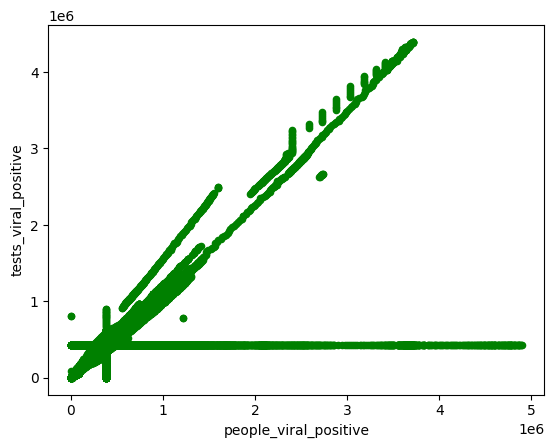

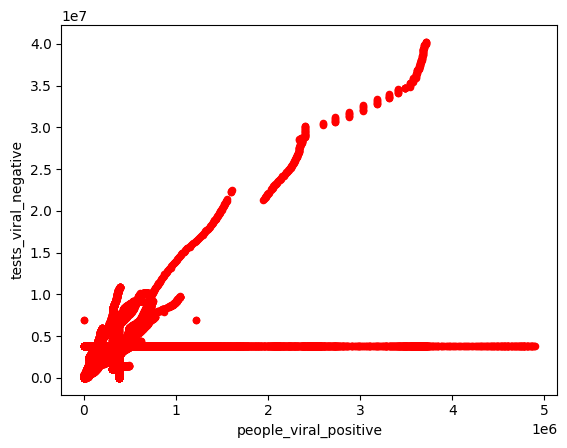

In [ ]:
#some visualization 
df1.plot.scatter(x='people_viral_positive', y='tests_viral_positive',color='green', )
df1.plot.scatter(x='people_viral_positive', y='tests_viral_negative',color='red')
plt.show()

In [ ]:
#spliting our data 
X=df1.drop(columns=['cases_probable'])
y=df1['cases_probable']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=19) 

In [ ]:
#our model 'Linear Regression'
import joblib 
model=LinearRegression()  
model.fit(X_train,y_train)
predicted=model.predict(X_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
joblib.dump(model,"covid.pkl")

MSE 1914676891.5389562
R squared 0.4943463008719664


['covid.pkl']

In [ ]:
!pip install Streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=bbbba9d7af1966303e80898161d5d219f14705e05c0e6139f47787c44e1b5412
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
# Define the predict function
import streamlit as st
def predict(df):
    predictions = model.predict(df)
    return predictions

# Define the Streamlit app
def app():
    st.title('streamlit')
    
    # Add user input section
    st.header('Enter the following parameters:')
    sepal_length = st.slider('Sepal length', 4.0, 8.0, 5.0)
    sepal_width = st.slider('Sepal width', 2.0, 5.0, 3.0)
    petal_length = st.slider('Petal length', 1.0, 7.0, 4.0)
    petal_width = st.slider('Petal width', 0.1, 2.5, 1.0)
    
    # Create a pandas dataframe with the user input
    data = {'sepal_length': sepal_length, 'sepal_width': sepal_width, 
            'petal_length': petal_length, 'petal_width': petal_width}
    df = pd.DataFrame(data, index=[0])
    
    # Add a button to predict the output
    if st.button('Predict'):
        prediction = predict(df)
        st.success(f'The predicted species is {prediction[0]}')
